# Class Work: Sentiment analysis

You will deal with the movies reviews. 2500 rows sample, 0 - negative sentiment, 1 - positive. 

In [33]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

<ipython-input-33-fd0b9af24538>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [34]:
data = pd.read_csv("data/data_sample.csv")

In [35]:
data.groupby(["Sentiment"]).size()

Sentiment
0    1238
1    1262
dtype: int64

In [36]:
data.head()

,SentimentText,Sentiment
0,"I'll give writer/director William Gove credit finding someone finance ill-conceived ""thriller."" good argument wasting money subscribing HBO, let alone buying DVDs based cover art blurbs. pedestrian Dennis Hopper game Richard Grieco add nothing significant resumes, although art direction half bad. dialogue leave grimacing wonder conceit; storytelling worst. tension, suspense, dread, fear, empathy, catharsis, nothing. attractive often nude females spice boredom, definitely film best seen trailer. feel sorry guy greenlighted thing. Good late-night, zoned-out viewing only. warned.",0
1,"film bit tedious. It's mostly silent film, bulk story provided series voice-overs. making silent film like bad idea, one films lack dialog repetitive early scenes make simply tedious. don't understand reason tedium well picture, it's late. first 40 minutes film something slow piece Mexican soft porn, unimaginative soft porn that. Later film style first 40 minutes starts makes sense, it's late, audience lost. nice location shooting National Autonomous University Mexico. I've often wondered films aren't shot there. campus built edge lava fields lend campus otherworldly feel. biggest problem film director/writer made film way wanted see without regard viewer doesn't know story view it. can't ignore audience tell story.",0
2,"watched movie, hoped something get better entire time. great guy emotion? *yawn*<br /><br />You never see Alex show emotion anyone son. Yeah, know son one cause lose temper (if call that), get it.<br /><br />Characters undeveloped, relationships aren't given enough time understood. one scene Sarah says won't fall love, next time see she's talking death really shook close? Logic synapses abound film.<br /><br />It's like someone watched Boogie Nights wrote part mimic Little Bill. Even scene ""loses temper"" Little Bill shoots wife, facial expression (or lack thereof). Yes, William H. Macy good portraying man without emotion - there, done - say Magnolia?<br /><br />This movie didn't lack emotion, lacked substance, good script, developed characters, plot. certainly lacks recommendation. :)<br /><br />~A~",0
3,watched Lion king times friends put togther. baby sister.. know is. memorized plot lines. Lion king 2 came like ok well let see... second one significantly weaker... saw ad lion king 1 1/2... like ok go again. watching 1 1/2 like wow. expectations (for repetitevness) broken. truly lovely original plot keeps glued seat entire time. noticed cartoon filled many comical moments ROFlmao apply 100%.<br /><br />I definetly recommend seeing cartoon.,1
4,"considered quite melancholy, especially watch great touching tear-jerking movies. one (which surprised me!) also really surprising see many people praised movie highly.<br /><br />There several disturbing facts throughout movies: 1. Despite guilt-ridden Ben's real intention save 7 lives redeem past, find disturbing film seems encourage type suicidal action. people may perceive heroic action others think behaves cowardly, end disturbing action me.<br /><br />2. movie story line over-dramatized, logic over-simplified. Medically, blood type match required organ donor. Toward end film learnt Emily rear blood type limited chance get donor within short time period. Nevertheless, seemed Ben rare blood type, allowed donor conveniently, despite rarity Ben's blood type, able donate heart, also kidney, cornea bone marrow cases require matching blood type also tissue antigen.<br /><br />3. doctors allow Ben's organs donated despite jellyfish venom used kill himself?<br /><br />I might over-analyzing whole story movie. However, disturbing facts outlined hopefully help reconsider plan go watch movie. go soap-opera type film, go it. go seeking intelligent entertainment, give one miss!",0


In [37]:
data.isnull().any().any()

False

## Task1: apply text normalization 


 - deal with html tags separately
 - clean up https/www links
 - do not remove stop-words as it may discard the sentiment
 - leave only letters. Numbers, symbols & punctuation to be removed (you may use re &/or some tokenizer)
 - bring text to lower case
 - do stemming/lemmatization
 - expand contractions

In [51]:
!pip install pymystem3

In [53]:
!pip install pymorphy2

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=7953ba1f6770e7b6c89eb24f78146081fec30dc1b0de25dd08f99813ffe1e073
  Stored in directory: c:\users\ъуъ\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [63]:
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem.snowball import RussianStemmer
from nltk.stem.snowball import SnowballStemmer
from pymystem3 import Mystem
import pymorphy2

In [64]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [73]:
data['SentimentText'] = [re.sub('<\w{1,10} ?\/?>', ' ', s) for s in data['SentimentText']]
data['SentimentText'] = [re.sub('(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', '', s) for s in data['SentimentText']]
data['SentimentText'] = [re.sub('[ \-!$%^&*()_+|~=`{}\[\]:";\<>?,.\/0-9]', ' ', s) for s in data['SentimentText']]
data['SentimentText'] = [s.lower() for s in data['SentimentText']]
data['SentimentText'] = [' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in s.split(" ")]) for s in data['SentimentText']]
data['SentimentText'] = [PorterStemmer().stem(s) for s in data['SentimentText']]


In [74]:
data.head()

,SentimentText,Sentiment
0,i will give writer director william gove credit finding someone finance ill conceived thriller good argument wasting money subscribing hbo let alone buying dvds based cover art blurbs pedestrian dennis hopper game richard grieco add nothing significant resumes although art direction half bad dialogue leave grimacing wonder conceit storytelling worst tension suspense dread fear empathy catharsis nothing attractive often nude females spice boredom definitely film best seen trailer feel sorry guy greenlighted thing good late night zoned out viewing only warned,0
1,film bit tedious it is mostly silent film bulk story provided series voice overs making silent film like bad idea one films lack dialog repetitive early scenes make simply tedious do not understand reason tedium well picture it is late first minutes film something slow piece mexican soft porn unimaginative soft porn that later film style first minutes starts makes sense it is late audience lost nice location shooting national autonomous university mexico i have often wondered films are not shot there campus built edge lava fields lend campus otherworldly feel biggest problem film director writer made film way wanted see without regard viewer does not know story view it cannot ignore audience tell story,0
2,watched movie hoped something get better entire time great guy emotion yawn you never see alex show emotion anyone son yeah know son one cause lose temper if call that get it characters undeveloped relationships are not given enough time understood one scene sarah says will not fall love next time see she is talking death really shook close logic synapses abound film it is like someone watched boogie nights wrote part mimic little bill even scene loses temper little bill shoots wife facial expression or lack thereof yes william h macy good portraying man without emotion there done say magnolia this movie did not lack emotion lacked substance good script developed characters plot certainly lacks recommendation a,0
3,watched lion king times friends put togther baby sister know is memorized plot lines lion king came like ok well let see second one significantly weaker saw ad lion king like ok go again watching like wow expectations for repetitevness broken truly lovely original plot keeps glued seat entire time noticed cartoon filled many comical moments roflmao apply i definetly recommend seeing cartoon,1
4,considered quite melancholy especially watch great touching tear jerking movies one which surprised me also really surprising see many people praised movie highly there several disturbing facts throughout movies despite guilt ridden ben's real intention save lives redeem past find disturbing film seems encourage type suicidal action people may perceive heroic action others think behaves cowardly end disturbing action me movie story line over dramatized logic over simplified medically blood type match required organ donor toward end film learnt emily rear blood type limited chance get donor within short time period nevertheless seemed ben rare blood type allowed donor conveniently despite rarity ben's blood type able donate heart also kidney cornea bone marrow cases require matching blood type also tissue antigen doctors allow ben's organs donated despite jellyfish venom used kill himself i might over analyzing whole story movie however disturbing facts outlined hopefully help reconsider plan go watch movie go soap opera type film go it go seeking intelligent entertainment give one miss,0


## Create word clouds

Make conclusion which words are important? How do you think, will it be possible to define positive & negative reviews?

In [75]:
!pip install wordcloud

In [76]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from wordcloud import WordCloud, STOPWORDS

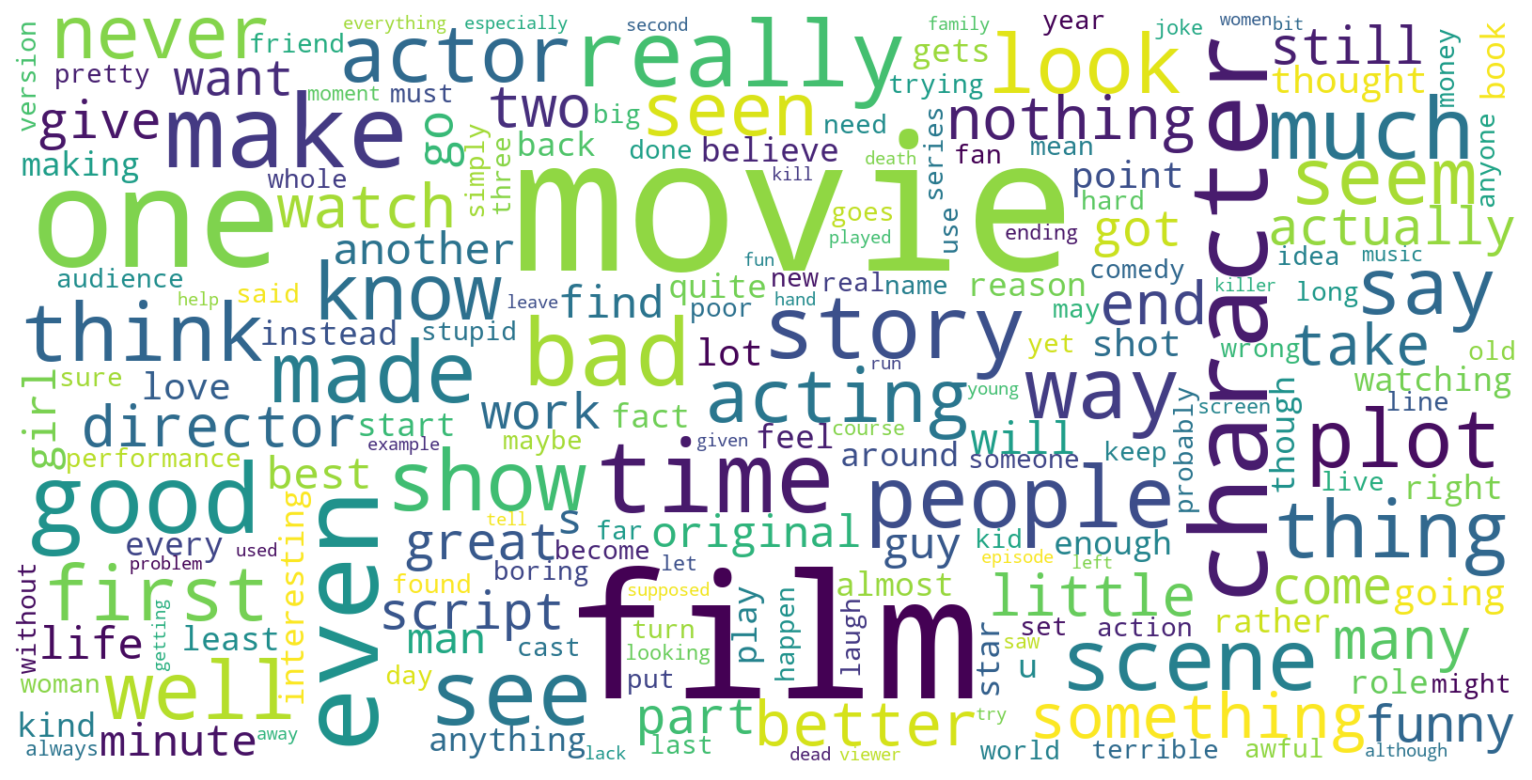

In [77]:
neg_tweets = data[data.Sentiment == 0]
neg_string = []
for t in neg_tweets.SentimentText:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

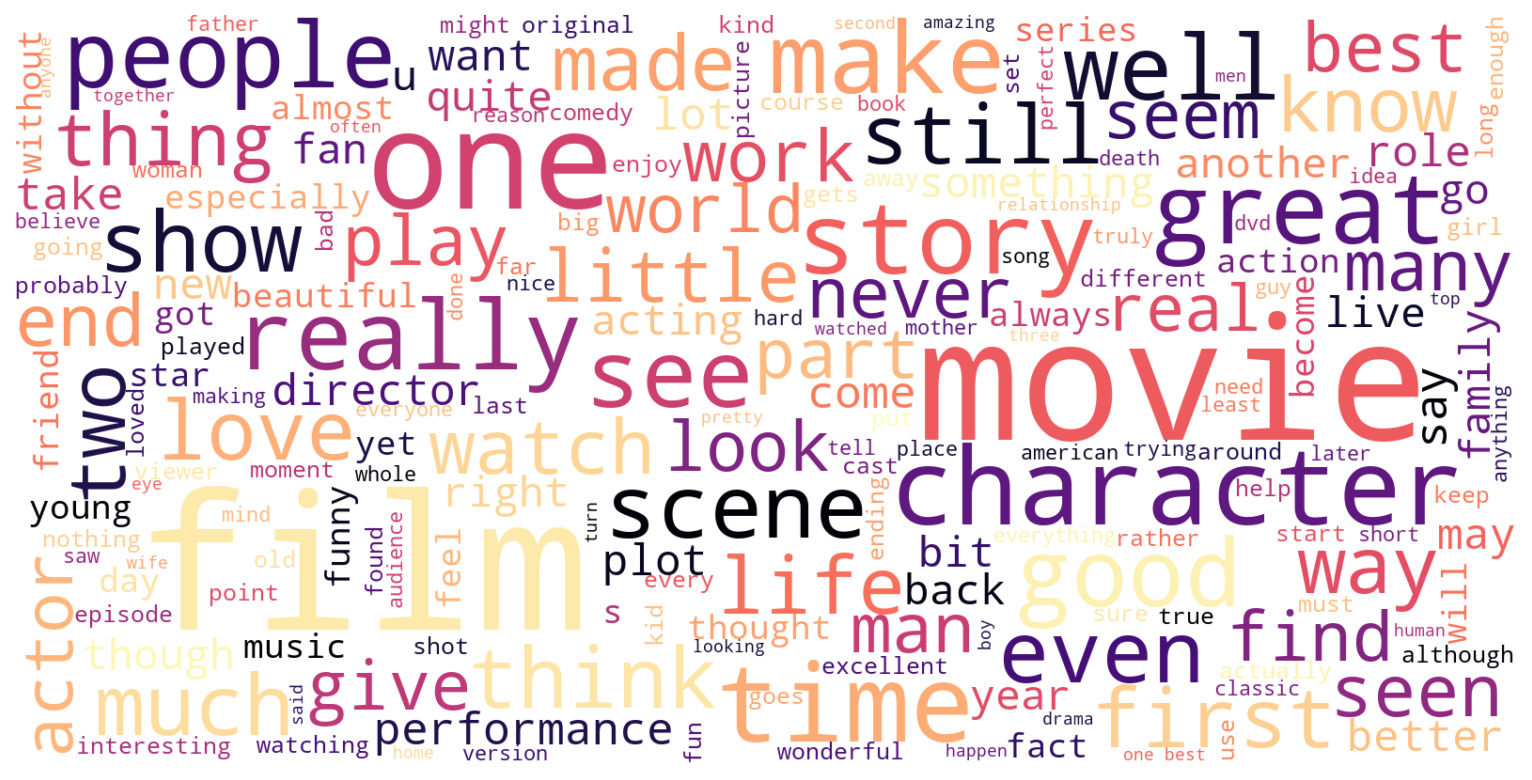

In [78]:
pos_tweets = data[data.Sentiment == 1]
pos_string = []
for t in pos_tweets.SentimentText:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='magma', background_color='white').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()